### Check http://pixelogik.github.io/NearPy/ for more information

In [1]:
%matplotlib inline

In [2]:
#!pip uninstall -y nearpy

# The version on pypy might have a bug?

# N = engine.neighbours(query,distance=EuclideanDistance())
# didn't work for me, but the source on github seems to work

In [3]:
import numpy

from nearpy import Engine
#from nearpy.hashes import RandomBinaryProjections
from nearpy.hashes import RandomDiscretizedProjections

from nearpy.filters import NearestFilter, UniqueFilter

from matplotlib import pyplot as plt
from nearpy.distances import EuclideanDistance

In [4]:
# Dimension of our vector space
dimension = 2

# Generate num_of_vectors random vectors
num_of_vectors = 1000
data=numpy.empty([dimension,num_of_vectors])
for index in range(num_of_vectors):
    data[:,index] = numpy.random.randn(dimension)+2.5

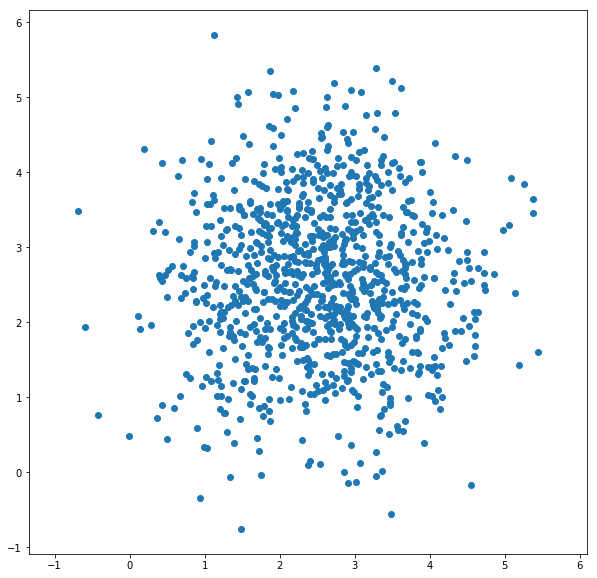

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])


In [6]:
# We are looking for the ten closest neighbours
nearest = NearestFilter(15)
# We want unique candidates
unique = UniqueFilter()


In [7]:
# Use four random 3-dim discretized projections

#make the bin_width bigger if you want more neighbour candidates
bin_width= .5

rdp1 = RandomDiscretizedProjections('rdp1', 4, bin_width)
rdp2 = RandomDiscretizedProjections('rdp2', 4, bin_width)
rdp3 = RandomDiscretizedProjections('rdp3', 4, bin_width)
rdp4 = RandomDiscretizedProjections('rdp4', 4, bin_width)

# Create engine with this configuration
engine = Engine(dimension, lshashes=[rdp1, rdp2, rdp3, rdp4], distance=EuclideanDistance(), vector_filters=[unique, nearest])


*** engine init done ***


In [8]:
#help(RandomDiscretizedProjections)
#help(RandomBinaryProjections)
#help(Engine)

In [9]:
index=17
print(data[:,index])
print(rdp1.hash_vector(data[:,index]))
print(rdp2.hash_vector(data[:,index]))
print(rdp3.hash_vector(data[:,index]))
print(rdp4.hash_vector(data[:,index]))


[4.60676937 1.67705679]
['-6_-7_-8_7']
['-6_-4_-12_2']
['-17_-12_10_-1']
['-18_3_2_-18']


In [10]:
# Index num_of_vectors random vectors (set their data to a unique string)
for index in range(num_of_vectors):
    v = data[:,index]
    engine.store_vector(v, 'data_%d' % index)                    

In [11]:
# Create random query vector
query = numpy.random.randn(dimension)+2.5
query = [4,4]
print(query)

[4, 4]


In [12]:
engine.candidate_count(query)

3

In [13]:
# Get nearest neighbours
N = engine.neighbours(query,distance=EuclideanDistance())
len(N)

2

In [14]:
#help(engine.neighbours)

In [15]:
N

[(array([3.89963546, 3.99809189]), 'data_166', 0.10038267304017018),
 (array([3.87245288, 4.13744247]), 'data_159', 0.18750653446838159)]

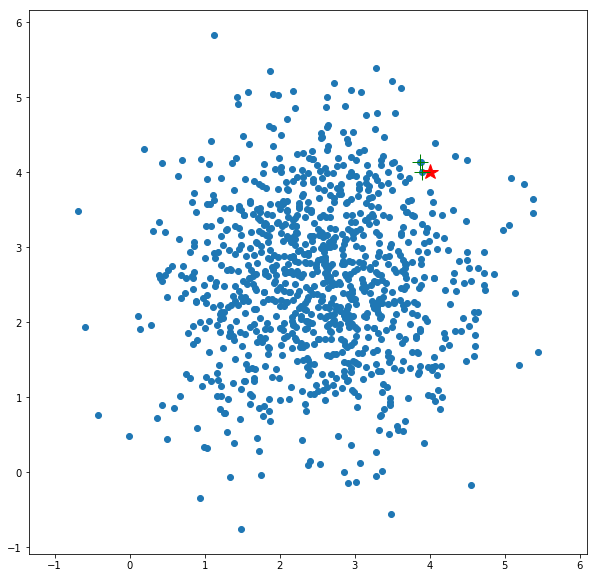

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])

plt.plot(query[0],query[1],'r*', markersize=16)
for iter in range(len(N)):
    #plt.plot(N[iter][0][0],N[iter][0][1],'g*', markersize=16)
    index=int(N[iter][1].split('_')[1])
    plt.plot(data[0,index],data[1,index],'g+', markersize=16)
